# Visualize the images

In [ ]:
# THis functions are used to select, save and visualize all the images from the same subject (just for visualization of the data). This will create a folder with images from the same subject.

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Function to load all images for a subject based on the subject ID in the filenames
def load_subject_images(directory, subject_id):
    subject_images = []
    
    # List all files in the directory
    for file_name in os.listdir(directory):
        # Check if the subject ID is in the file name
        if subject_id in file_name and file_name.endswith('.nii'):
            # Load the image using nibabel
            file_path = os.path.join(directory, file_name)
            img = nib.load(file_path)
            img_data = img.get_fdata()  # Extract the image data
            subject_images.append((file_name, img_data))
    
    return subject_images

# Function to save multiple slices of the same subject's images
def save_images(images, subject_id, output_directory):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Save each image as a PNG file
    for i, (file_name, img_data) in enumerate(images):
        # Select a central slice from the middle of the volume for visualization (assuming 3D volumes)
        slice_idx = img_data.shape[2] // 2  # Get a slice from the middle in the z-direction
        
        # Create the figure for saving
        plt.imshow(img_data[:, :, slice_idx], cmap='gray')
        plt.axis('off')  # Hide axes
        
        # Define the output file path
        output_file = os.path.join(output_directory, f"{subject_id}_slice_{i+1}.png")
        
        # Save the figure as a PNG file
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()  # Close the figure to release memory
        
        print(f"Saved: {output_file}")

# Main function to process a given subject ID and save all images
def save_subject_images(directory, subject_id, output_directory):
    images = load_subject_images(directory, subject_id)
    if images:
        save_images(images, subject_id, output_directory)
    else:
        print(f"No images found for subject ID: {subject_id}")

# Example usage
directory = "./database"# Set your directory with .nii files
subject_id = 'U127'  # Set the subject ID you want to visualize
output_directory = './database/same_subject'  # Directory to save the images
save_subject_images(directory, subject_id, output_directory)


0.010598301887512207 0.048172057746342034 0.12206032086942287


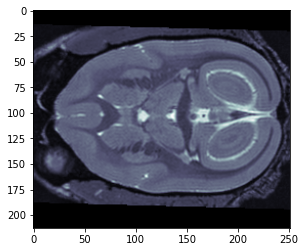

In [2]:
# Create array with image names

path_to_images="./database"

image_names= os.listdir(path_to_images)
image_names=image_names[2:-2]
image_names

# Visualize image

import nibabel as nib
ext_brain_image = nib.load('./database/'+image_names[5])

data = ext_brain_image.get_fdata()
Q1 = np.percentile(data.flatten(), 25)
Q2 = np.percentile(data.flatten(), 50)
Q3 = np.percentile(data.flatten(), 75)
print(Q1,Q2,Q3)
plt.imshow(ext_brain_image.get_fdata()[:,:,100], cmap='bone')

In [3]:
# Import data from file

import pandas as pd

marms = pd.read_csv('database/marms.csv')
y_months = [marms["agemonths"][i] for i in range(len(marms["agemonths"])) if marms["fname"][i] in image_names]
y_days = [marms["agedays"][i] for i in range(len(marms["agedays"])) if marms["fname"][i] in image_names]
names= [marms["fname"][i] for i in range(len(marms["fname"])) if marms["fname"][i] in image_names]
gender = [marms["ismale"][i] for i in range(len(marms["fname"])) if marms["fname"][i] in image_names]

                      

# Brain extraction

We substract from the images all the additional structures, we just want the brain. For the brain extraction, we use a brain image and a mask from an marmoset`s brain atlas found in Internet (https://marmosetbrainmapping.org/)


(213, 251, 170)

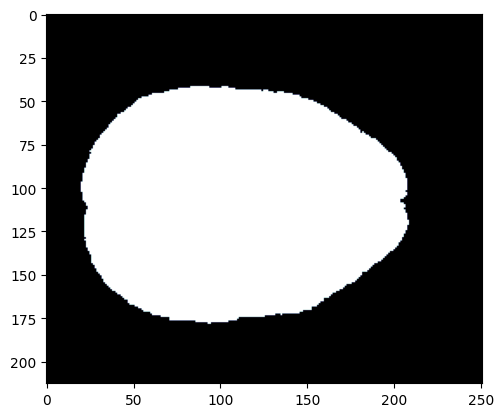

In [3]:
# Load the mask from the brain atlas and visualize it

import nibabel as nib
import matplotlib.pyplot as plt
ext_brain_image = image = nib.load('./mask.nii.gz')

plt.imshow(ext_brain_image.get_fdata()[:,:,120], cmap='bone')

ext_brain_image.get_fdata().shape


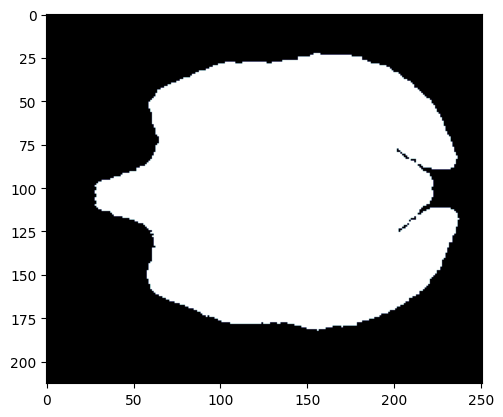

In [2]:
# Swap the mask so it matches the orientation of our images

import nibabel as nib
import matplotlib.pyplot as plt

img = nib.load('./mask.nii.gz')
img_swaped = nib.Nifti1Image(img.dataobj[::-1,::-1,:], img.affine, img.header)
plt.imshow(img_swaped.get_fdata()[:,:,80], cmap='bone')

img_swaped.to_filename("mask_swapped.nii.gz")

In [ ]:
# Use the swapped mask in our images to generate brain-extracted MRI data

pathtosave = 'Brain_Extracted_image_better/'
if not os.path.exists(pathtosave):
    os.makedirs(pathtosave)
mask_swaped = nib.load('./mask_swapped.nii.gz')
for i,img in enumerate(image_names):
    brain_image= nib.load(path_to_images+'/'+img)

    # There are some data from the database that are different from the rest. We look at the dimension of the MRI volumes and discard the ones that are not what it should be
    if brain_image.get_fdata().shape[0] == 213:
        
        masked_data = mask_swaped.get_fdata()*brain_image.get_fdata()
        # Save the masked MRI image
        masked_img = nib.Nifti1Image(masked_data, brain_image.affine)
        nib.save(masked_img, pathtosave+'brain_extracted_norm_'+img)
    else:
        print(img)


In [ ]:
path_to_images_b="./Brain_Extracted_image_better"

# List with brain_extracted images
mask_names= os.listdir(path_to_images_b)
len(mask_names)

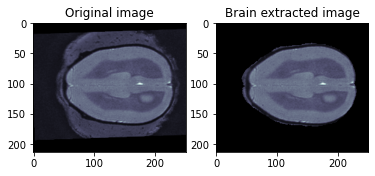

In [10]:
# This is an example of how the mask is applied in one MRI volume

# Apply the mask to the MRI image
mask_swapped = nib.load('./mask_swapped.nii.gz')
brain_image= nib.load(path_to_images+'/'+image_names[2])
masked_data = mask_swapped.get_fdata()*brain_image.get_fdata()


# Save the masked MRI image
masked_img = nib.Nifti1Image(masked_data, brain_image.affine)

plt.subplot(1,2,1)
plt.imshow(brain_image.get_fdata()[:,:,120], cmap='bone')
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(masked_img.get_fdata()[:,:,120], cmap='bone')
plt.title("Brain extracted image")
plt.show()